## Анализ причин выжимаемости на Титанике

В качестве первого домашнего задания Вам предстоит сформулировать и проверить гипотезы о причинах выживаемости на Титанике. Необходимые данные можно найти на [GitHub](https://github.com/aleksei-riabykh/sberbank_data_analysis_06_07_21/tree/master/data/titanic) курса, описание к данным на сайте соревнований по анализу данных [Kaggle](https://www.kaggle.com/c/titanic/data). 

Критерии оценивания:
* Четко сформулированы гипотезы и выводы из них
* Гипотез не меньше 3-х
* Присутствуют кросс-признаковые гипотезы (например, процент выживаемости среди молодых женщин: пол + возраст)
* Использованы группировки `.groupby()` с агрегированием `.aggregate()`, трансформацией `.transform()` или фильтрацией  `.filter()` данных
* Присутствует визуализация
* Присутствует общий вывод исследования

## Шаблон исследования

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

Загружаем данные

In [2]:
data = pd.read_csv('../data/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.shape

(891, 12)

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data[data.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [8]:
data[data.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [9]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Lang, Mr. Fang",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [12]:
data.groupby(['Age'])['Fare'].aggregate([min, np.mean, max])

,min,mean,max
Age,,,
0.42,8.5167,8.5167,8.5167
0.67,14.5000,14.5000,14.5000
0.75,19.2583,19.2583,19.2583
0.83,18.7500,23.8750,29.0000
0.92,151.5500,151.5500,151.5500
...,...,...,...
70.00,10.5000,40.7500,71.0000
70.50,7.7500,7.7500,7.7500
71.00,34.6542,42.0792,49.5042


In [13]:
data[data.Age < 10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.00,3,1,349909,21.0750,NaN,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.00,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.00,1,1,2678,15.2458,NaN,C


In [14]:
data.groupby(['Pclass', 'Age'])['Fare'].aggregate([min, np.median, max]).reset_index()

,Pclass,Age,min,median,max
0,1,0.92,151.5500,151.5500,151.5500
1,1,2.00,151.5500,151.5500,151.5500
2,1,4.00,81.8583,81.8583,81.8583
3,1,11.00,120.0000,120.0000,120.0000
4,1,14.00,120.0000,120.0000,120.0000
...,...,...,...,...,...
177,3,61.00,6.2375,6.2375,6.2375
178,3,63.00,9.5875,9.5875,9.5875
179,3,65.00,7.7500,7.7500,7.7500
180,3,70.50,7.7500,7.7500,7.7500


In [15]:
data.groupby(['Pclass', 'Age'])[['Fare', 'SibSp']].aggregate([min, np.median, max])

Fare                     SibSp           
                   min    median       max   min median max
Pclass Age                                                 
1      0.92   151.5500  151.5500  151.5500     1    1.0   1
       2.00   151.5500  151.5500  151.5500     1    1.0   1
       4.00    81.8583   81.8583   81.8583     0    0.0   0
       11.00  120.0000  120.0000  120.0000     1    1.0   1
       14.00  120.0000  120.0000  120.0000     1    1.0   1
...                ...       ...       ...   ...    ...  ..
3      61.00    6.2375    6.2375    6.2375     0    0.0   0
       63.00    9.5875    9.5875    9.5875     0    0.0   0
       65.00    7.7500    7.7500    7.7500     0    0.0   0
       70.50    7.7500    7.7500    7.7500     0    0.0   0
       74.00    7.7750    7.7750    7.7750     0    0.0   0

[182 rows x 6 columns]

In [16]:
data.groupby(['Pclass', 'Age'])[['Fare', 'SibSp']].aggregate({'Fare':np.median, 'SibSp':np.max})

Fare  SibSp
Pclass Age                   
1      0.92   151.5500      1
       2.00   151.5500      1
       4.00    81.8583      0
       11.00  120.0000      1
       14.00  120.0000      1
...                ...    ...
3      61.00    6.2375      0
       63.00    9.5875      0
       65.00    7.7500      0
       70.50    7.7500      0
       74.00    7.7750      0

[182 rows x 2 columns]

In [17]:
data.groupby(['Pclass'])['Fare'].transform(lambda x: x / sum(x))

0      0.001080
1      0.003922
2      0.001180
3      0.002921
4      0.001199
         ...   
886    0.003419
887    0.001650
888    0.003492
889    0.001650
890    0.001154
Name: Fare, Length: 891, dtype: float64

In [18]:
# пассжиры, которые заплатили более 100$ за билет
data.groupby(['Name']).filter(lambda x: x['Fare'] > 100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
215,216,1,1,"Newell, Miss. Madeleine",female,31.00,1,0,35273,113.2750,D36,C
258,259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


In [19]:
pd.crosstab(data['Sex'], data['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [20]:
# Общее количество пассажиров
data['PassengerId'].nunique()

891

In [21]:
# Доля выживших пассажиров
data['Survived'].sum() / data.PassengerId.nunique()

0.3838383838383838

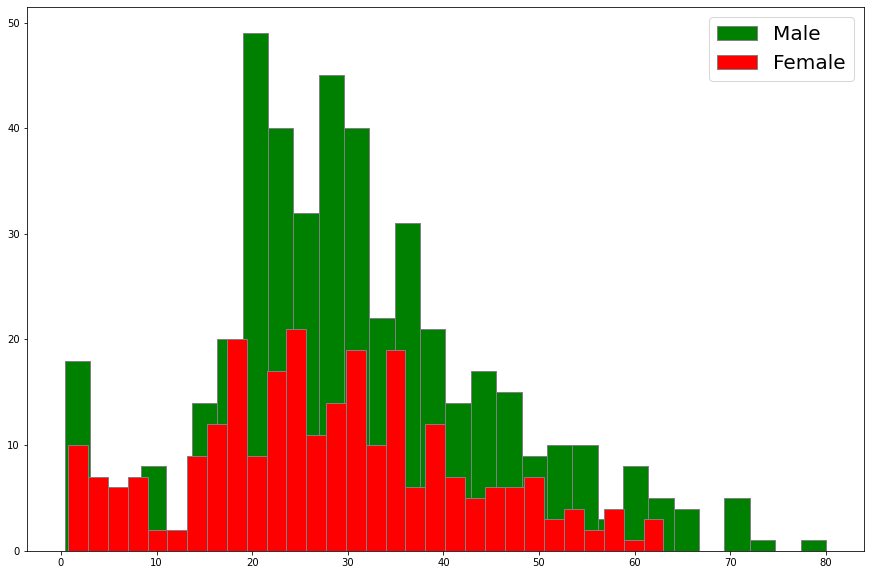

In [22]:
ax = data[data['Sex'] == 'male']['Age'].hist(figsize=(15, 10),
                                             bins=30,
                                             edgecolor='gray',
                                             grid=False,
                                             color='green')

data[data['Sex'] == 'female']['Age'].hist(figsize=(15, 10),
                                          bins=30,
                                          edgecolor='gray',
                                          grid=False,
                                          color='red')

ax.legend(['Male', 'Female'], prop={'size':20})

### Гипотеза 1

__Формулировка__:

Зависит ли выживаемость (смертность) от класса. Влияет ли на это общее количество человек в классе.

In [23]:
# Код для проверки гипотезы

display(pd.crosstab(data['Survived'], data['Pclass']))
display(data.groupby(['Survived', 'Pclass'])['PassengerId'].count())

###

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: PassengerId, dtype: int64

__Вывод__:

Те, кто плыли в 1 классе, выжило больше, но общее кол-во человек больше, чем во 2 и меньше, чем в 3.

Те, кто плыли во 2 классе, приблизительно равное количество выживших и умерших, но общее количество человек меньше, чем в 1 и в 3.

Те, кто плыли в 3 классе, выжило меньше, но общее количество человек больше, чем в 1 и во  2.

###  Гипотеза 2

__Формулировка__:

Зависит ли выживаемость (смертность) от пола. Связано ли это с классом.

In [24]:
# Код для проверки гипотезы

display(pd.crosstab(data['Survived'], data['Sex']))
display(data.groupby(['Survived', 'Sex', 'Pclass'])['PassengerId'].count())

###

Sex,female,male
Survived,,
0,81,468
1,233,109


Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: PassengerId, dtype: int64

__Вывод__:

Не секрет, что женщин выжило больше, чем мужчин. Независимо от класса. Это связано с тем, что на спастельные лодки пускали в основном женщин.

### Гипотеза 3
 
__Формулировка__:

Зависит ли выживаемость (смертность) от количества родственников  

In [25]:
# Код для проверки гипотезы

data.groupby(['Survived', 'SibSp'])['PassengerId'].count()

###

Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: PassengerId, dtype: int64

In [26]:
data[data['SibSp'] == 0].groupby(['Survived', 'SibSp'])['PassengerId'].count()

Survived  SibSp
0         0        398
1         0        210
Name: PassengerId, dtype: int64

In [27]:
data[data['SibSp'] != 0].groupby(['Survived'])['PassengerId'].count()

Survived
0    151
1    132
Name: PassengerId, dtype: int64

__Вывод__:

Погибло больше пассажиров, у которых не было родственников. От части это связано с тем, что людей без родственников было больше

### Гипотеза 4
 
__Формулировка__:

Зависит ли выживаемость (смертность) от порта посадки

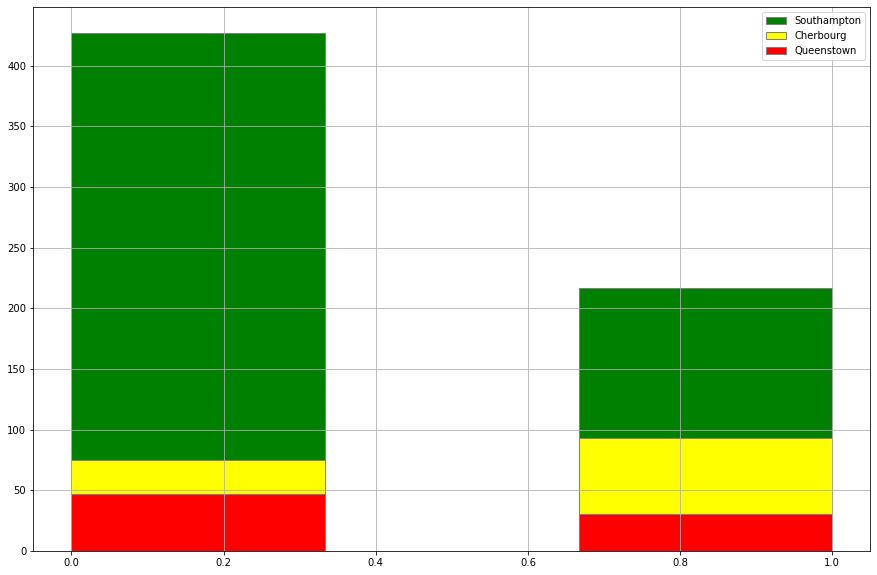

In [28]:
ax = data[data.Embarked == 'S']['Survived'].hist(figsize=(15, 10),
                                            bins=3, 
                                            edgecolor='gray',
                                            grid=False,
                                            color='green')

data[data.Embarked == 'C']['Survived'].hist(figsize=(15, 10),
                                       bins=3,
                                       edgecolor='gray',
                                       color='yellow')

data[data.Embarked == 'Q']['Survived'].hist(figsize=(15, 10),
                                       bins=3,
                                       edgecolor='gray',
                                       color='red')

ax.legend(['Southampton', 'Cherbourg', 'Queenstown'])

In [29]:
data.groupby(['Survived', 'Embarked',])['PassengerId'].count()

Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: PassengerId, dtype: int64

In [30]:
df1 = data[(data.Survived == 0)].groupby(['Embarked', 'Survived'])['PassengerId'].count().reset_index()
df2 = data[(data.Survived == 1)].groupby(['Embarked', 'Survived'])['PassengerId'].count().reset_index()
new_df = df1.merge(df2, on='Embarked', how='inner')
# dt['percent_Survived'] = dt.PassengerId_x / (dt.PassengerId_y + dt.PassengerId_x)
# dt['percent_Survived_Embarked'] = dt.PassengerId_y / dt.PassengerId_x
# dt
new_df

,Embarked,Survived_x,PassengerId_x,Survived_y,PassengerId_y
0,C,0,75,1,93
1,Q,0,47,1,30
2,S,0,427,1,217


In [31]:
new_df['Survived_share'] = round(new_df['PassengerId_x'] / (new_df['PassengerId_x'] + new_df['PassengerId_y']), 2)
new_df['Embarked_share'] = round(new_df['PassengerId_y'] / new_df['PassengerId_x'], 2)
new_df

,Embarked,Survived_x,PassengerId_x,Survived_y,PassengerId_y,Survived_share,Embarked_share
0,C,0,75,1,93,0.45,1.24
1,Q,0,47,1,30,0.61,0.64
2,S,0,427,1,217,0.66,0.51


__Вывод__:

Больше всего погибших пассажиров было из Southampton, но и село там больше всего.

Выживаемость выше у пассажиров из Cherbourg (видимо там садились женщины из первого класса).

Доля умерших пассажиров из Southampton выше всех.

### Вывод исследования:

  

По имеющимся данным можно сделать различные выводы, подтвердить или опровергнуть множество гипотез. Визуализация также помогает понять данные. В своей работе удалось получить следующие выводы:
1. Те, кто плыли в 1 классе, выжило больше, но общее кол-во человек больше, чем во 2 и меньше, чем в 3.
2. Женщин выжило больше, чем мужчин. Независимо от класса
3. Численно погибло больше пассажиров, у которых не было родственников.
4. Выживаемость выше у пассажиров из Cherbourg.